# Problem Statement
Hiring and retaining employees are extremely complex tasks that require time , capital and skills. Companies spend 15-20% of the employee’s salary to recruit a new candidate.
The dataset provided in this case study is collected by HR and provided to analyse and build a strong predictive model to reduce the employee attrition.


# Loading the datasets

In [1]:
# Import libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/My Drive/Modern AI/Data Science projects/Human Resources'

/content/drive/My Drive/Modern AI/Data Science projects/Human Resources


In [4]:
# Loading dataset
employee_df = pd.read_csv('Human_Resources.csv')
employee_df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Observation:
The data set has 1470 records of employees and 35 columns

# Data Visualization

In [6]:
# Dropping column Over18 as it's not useful for the task
employee_df.drop('Over18',axis=1,inplace = True)
# Let's change the values of columns Attrition and OverTime to integer values 
employee_df['Attrition'] = employee_df['Attrition'].map({'Yes':1,'No':0})
employee_df['OverTime'] = employee_df['OverTime'].map({'Yes':1,'No':0})
employee_df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


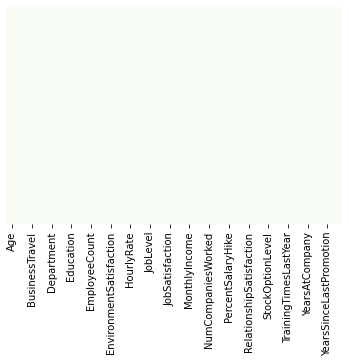

In [7]:
# Let's check if there is any missing data
sns.heatmap(employee_df.isnull(),yticklabels=False, cbar=False,cmap='Greens')
plt.show()

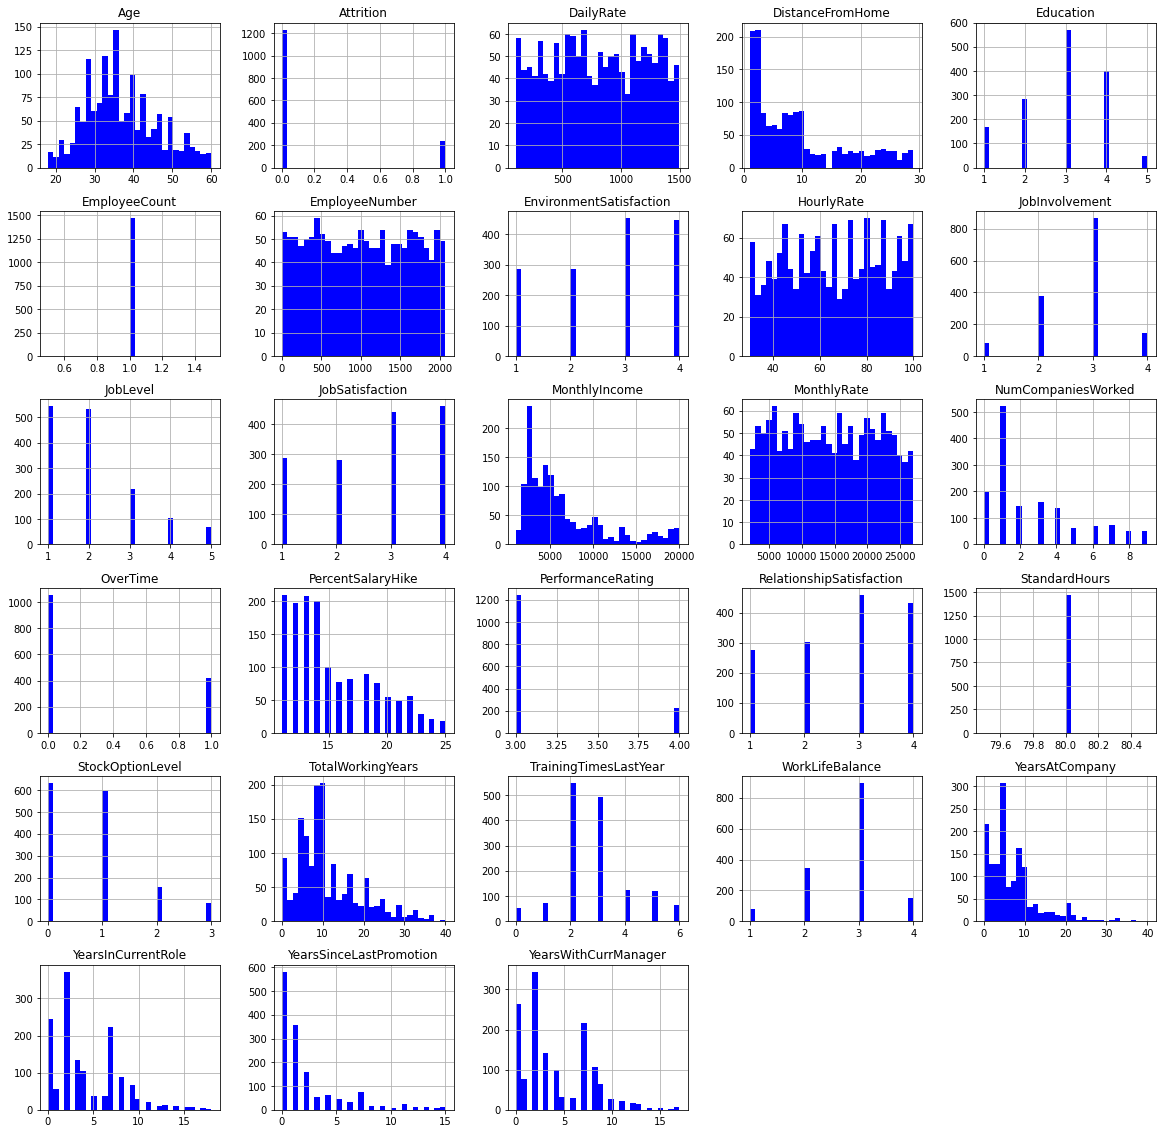

In [8]:
# Plotting histogram on the dataset
employee_df.hist(bins=30,figsize=(20,20),color='b')
plt.show()

In [9]:
# Dropping columns -- EmployeeCount and StandardHours as they don't tend to change from employees
# Let's drop EmployeeNumber as well
employee_df.drop(['EmployeeCount','StandardHours','EmployeeNumber'],axis=1,inplace=True)


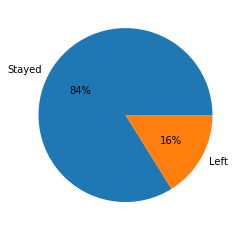

In [10]:
plt.pie(employee_df['Attrition'].value_counts(),autopct='%1.0f%%',labels=['Stayed','Left'])
plt.show()

## Outlier analysis & treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


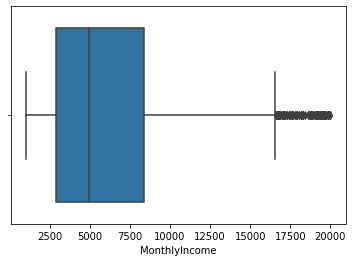

In [11]:
# Plotting boxplot on Monthly Income
sns.boxplot(employee_df['MonthlyIncome'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


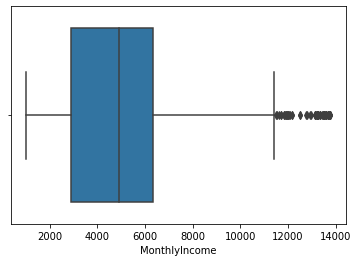

In [12]:
# last 10 percentile of records from the dataset
# Imputing these outlier salaries with the median value of salary
med_sal = np.median(employee_df['MonthlyIncome'])
employee_df['MonthlyIncome'] = np.where(employee_df['MonthlyIncome'] >= np.percentile(employee_df['MonthlyIncome'],90),med_sal,employee_df['MonthlyIncome'])
# Plotting boxplot on Monthly Income
sns.boxplot(employee_df['MonthlyIncome'])
plt.show()

In [13]:
# Looks like here we are dealing with the imbalance dataset
# Creating dataframes of employees who left the company and who stayed for deeper analysis
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [14]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [15]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


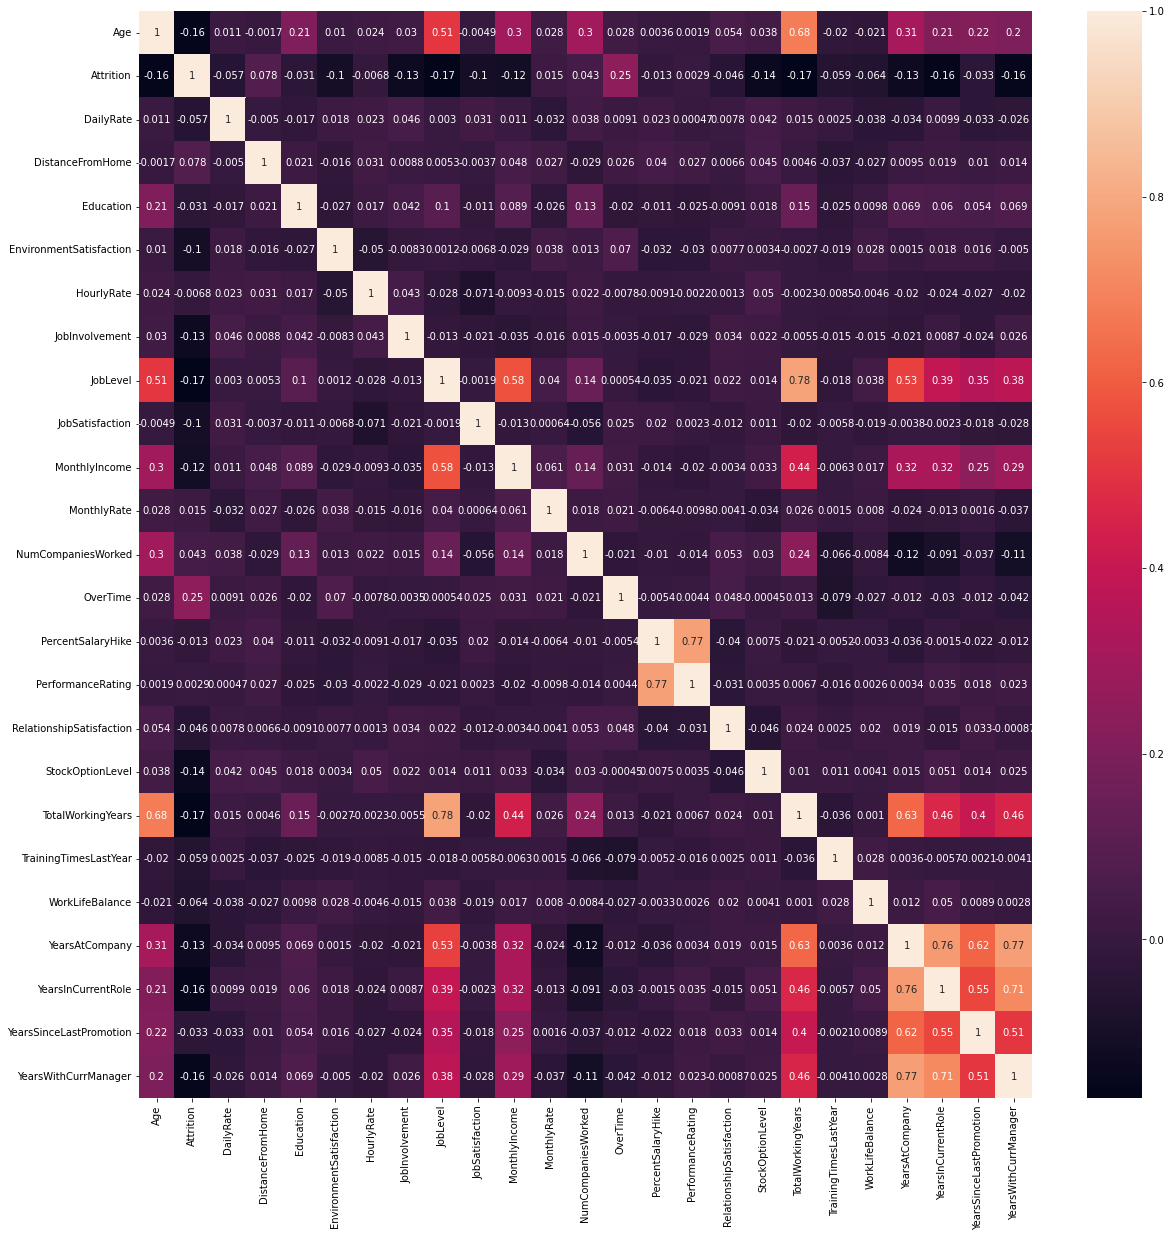

In [16]:
# Plotting correlation heatmap to understand the correlation between features
corr = employee_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

### Observations
1. There are many features whose distribution is rightly skewed like distanceFromHome , MonthlyIncome , TotalWorkingYears etx which gives a sense that there are some employees which are the higher range of these features which could give a hint on attrition.
2. There are 16% employees have left the company on the given dataset hence it's a little imbalanced dataset
3. Age is highly correlated with MonthlyIncome, Joblevel and TotalWorkingYears.
4. YearsAtCompany has high positive correlation with JobLevel, MonthlyIncome, TotalWorkingYears and YearsWithCurrentManager.
5. PerformanceRating has a high positive correlation with PercentSalaryHike
6. JobLevel has a very high correlation with Monthly Income

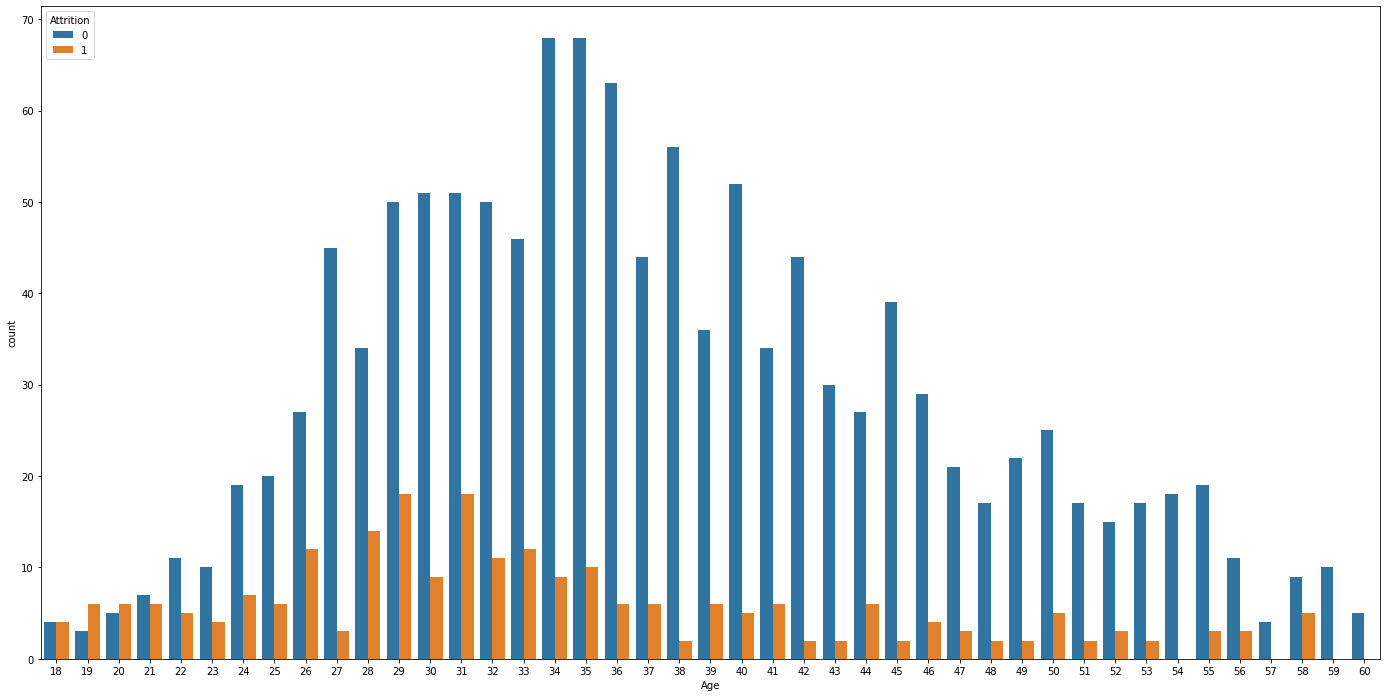

In [17]:
plt.figure(figsize=(24,12))
sns.countplot(x='Age',hue='Attrition',data = employee_df)
plt.show()

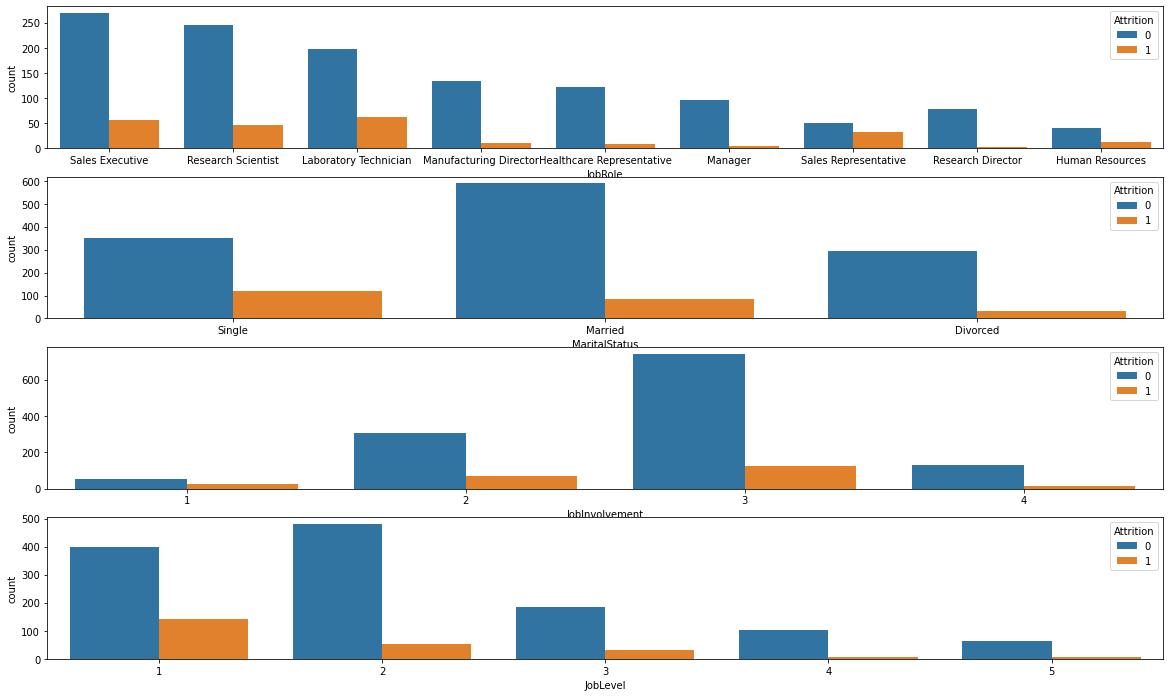

In [18]:
# Plotting other count plots to analyze attrition factors
plt.figure(figsize=(20,12))

plt.subplot(411)
sns.countplot(x='JobRole',hue='Attrition',data = employee_df)
plt.subplot(412)
sns.countplot(x='MaritalStatus',hue='Attrition',data = employee_df)
plt.subplot(413)
sns.countplot(x='JobInvolvement',hue='Attrition',data = employee_df)
plt.subplot(414)
sns.countplot(x='JobLevel',hue='Attrition',data = employee_df)

plt.show()

### Observation:
1. As Job level increases employees tend to leave very less.
2. Attrition is higher for Sales Representative role.
3. Single employees tend to leave more than married and divorced employees.

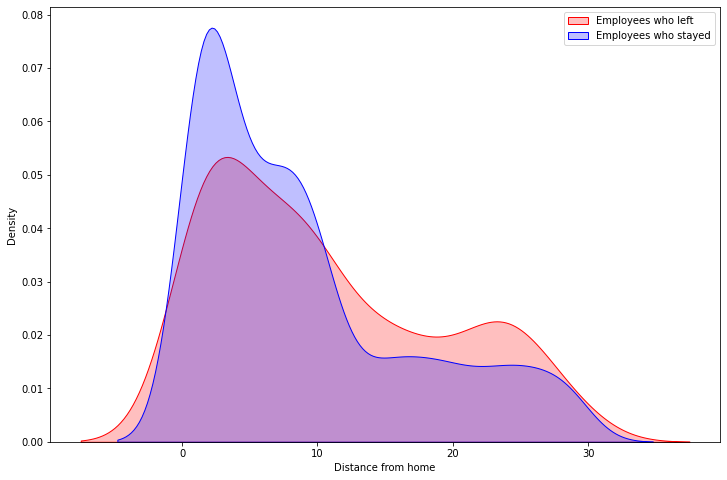

In [19]:
# Analyzing distance from home
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['DistanceFromHome'],label='Employees who left',shade=True,color='r')
sns.kdeplot(stayed_df['DistanceFromHome'],label='Employees who stayed',shade=True,color='b')
plt.xlabel('Distance from home')
plt.legend()
plt.show()

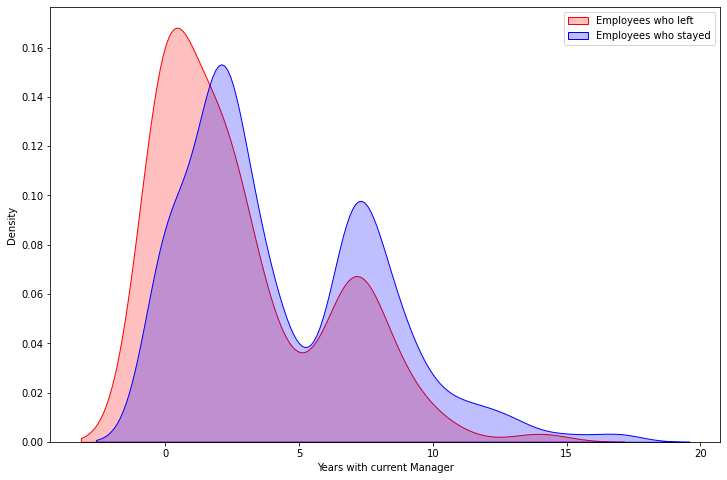

In [20]:
# Analyzing Years with current manager
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['YearsWithCurrManager'],label='Employees who left',shade=True,color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'],label='Employees who stayed',shade=True,color='b')
plt.xlabel('Years with current Manager')
plt.legend()
plt.show()

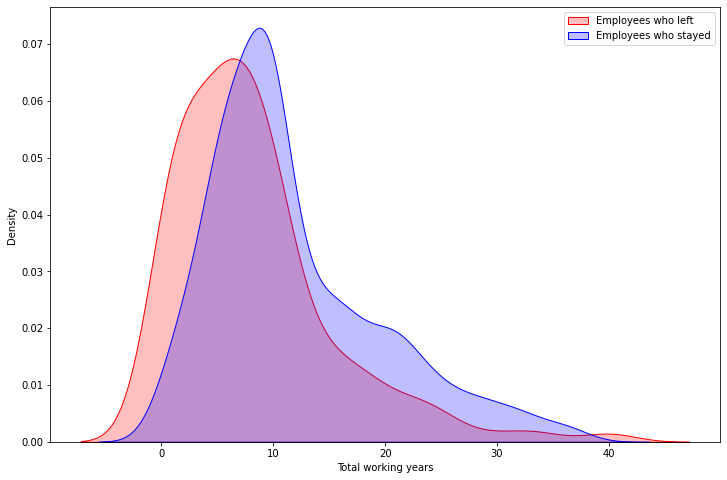

In [21]:
# Analyzing Total working years
plt.figure(figsize=(12,8))
sns.kdeplot(left_df['TotalWorkingYears'],label='Employees who left',shade=True,color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'],label='Employees who stayed',shade=True,color='b')
plt.xlabel('Total working years')
plt.legend()
plt.show()

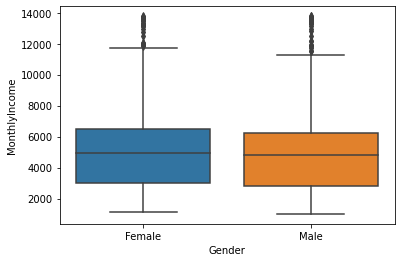

In [22]:
# Plotting boxplot for gender vs monthly income
sns.boxplot(data=employee_df,x='Gender',y='MonthlyIncome')
plt.show()

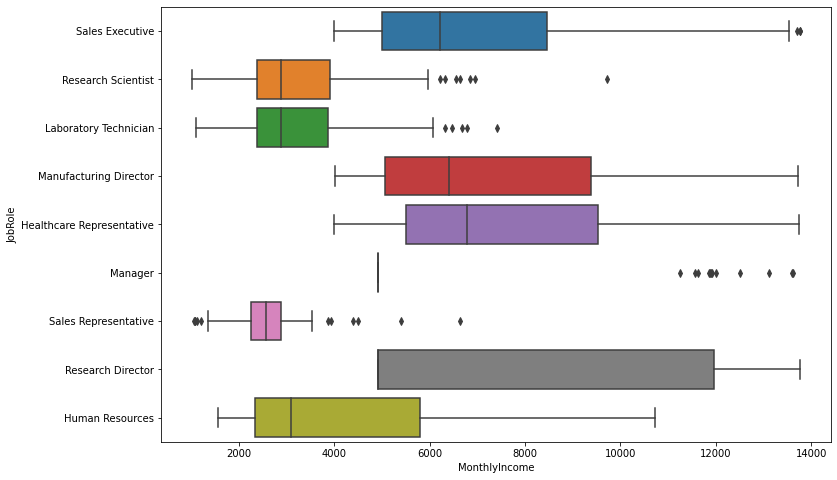

In [23]:
# Plotting boxplot for Jobrole vs monthly income
plt.figure(figsize=(12,8))
sns.boxplot(data=employee_df,y='JobRole',x='MonthlyIncome')
plt.show()

### Creating train and test dataset & clean the dataset

In [24]:
employee_df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


In [25]:
# Extracting categorical data to convert into number
X_cat = employee_df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
X_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [26]:
X_cat = pd.get_dummies(X_cat,drop_first = True)
X_cat.shape

(1470, 20)

In [27]:
num_cols = [cols for cols in employee_df.columns if cols not in ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]

In [28]:
X_num = employee_df[num_cols]
X_num.shape

(1470, 24)

In [29]:
# Concatenating categorical and numerical columns to prepare the dataset for model training
X = pd.concat([X_cat,X_num],axis=1)
y = employee_df['Attrition']
print(X.shape)
print(y.shape)

(1470, 44)
(1470,)


In [30]:
# Before scaling dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print('Train shape',X_train.shape)
print('Test shape',X_test.shape)

Train shape (1176, 44)
Test shape (294, 44)


In [31]:
# Applying Normalization (Min max scaling) on the train data and then applying the scaling on the test data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X_train)
X_train = pd.DataFrame(X_scaled,columns=X_train.columns)
X_test_scaled = scale.transform(X_test)
X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns)

## Building Logistic regression classifier for the prediction

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

In [33]:
import math
lr = LogisticRegression(n_jobs=-1,class_weight={0:25,1:75})
c_space = [math.pow(10,i) for i in range(-5,5)]
params = {'C':c_space}

grid_cv = GridSearchCV(lr,param_grid=params,scoring='roc_auc',cv=5, verbose = 1,return_train_score=True)
grid_cv.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 25, 1: 75},
                                          n_jobs=-1),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                               100.0, 1000.0, 10000.0]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [34]:
print('Best params',grid_cv.best_params_)
print('Best score',grid_cv.best_score_)
best_model = grid_cv.best_estimator_

Best params {'C': 0.1}
Best score 0.8459531192232234


In [35]:
y_test_pred = best_model.predict(X_test)
print('Accuracy score:',round(accuracy_score(y_test,y_test_pred),2))
print('F1 score:',round(f1_score(y_test,y_test_pred),2))
print('ROC_AUC score:',round(roc_auc_score(y_test,y_test_pred),2))
print('Precision score:',round(precision_score(y_test,y_test_pred),2))
print('Recall score:',round(recall_score(y_test,y_test_pred),2))

Accuracy score: 0.81
F1 score: 0.49
ROC_AUC score: 0.71
Precision score: 0.43
Recall score: 0.57


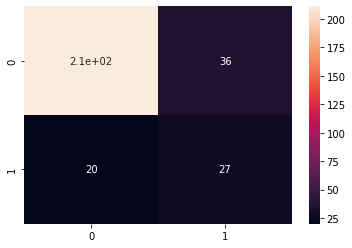

In [36]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True)

In [37]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       247
           1       0.43      0.57      0.49        47

    accuracy                           0.81       294
   macro avg       0.67      0.71      0.69       294
weighted avg       0.84      0.81      0.82       294



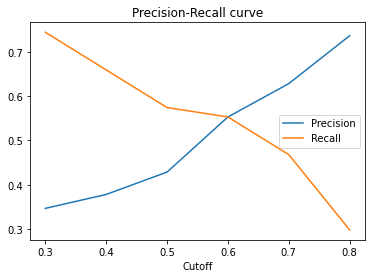

In [38]:
# Using precision-recall curve to find out right cutoff
def plotPrecisionRecallCurve(y_test_prob,y_test):
  cutoffs = [0.3,0.4,0.5,0.6,0.7,0.8]
  precision = []
  recall = []
  for cutoff in cutoffs:
    test_pred = np.where(y_test_prob >= cutoff,1,0)
    precision.append(precision_score(y_test,test_pred))
    recall.append(recall_score(y_test,test_pred))

  plt.plot(cutoffs,precision,label='Precision')
  plt.plot(cutoffs,recall,label='Recall')
  plt.xlabel('Cutoff')
  plt.title('Precision-Recall curve')
  plt.legend()
  plt.show()

y_test_prob = best_model.predict_proba(X_test)[:,1]
plotPrecisionRecallCurve(y_test_prob,y_test)

In [39]:
thres = 0.6
y_test_pred = np.where(y_test_prob >= thres,1,0)
print('Accuracy score:',round(accuracy_score(y_test,y_test_pred),2))
print('F1 score:',round(f1_score(y_test,y_test_pred),2))
print('ROC_AUC score:',round(roc_auc_score(y_test,y_test_pred),2))
print('Precision score:',round(precision_score(y_test,y_test_pred),2))
print('Recall score:',round(recall_score(y_test,y_test_pred),2))

Accuracy score: 0.86
F1 score: 0.55
ROC_AUC score: 0.73
Precision score: 0.55
Recall score: 0.55


## Train and evaluate a deep learning model

In [40]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation = 'relu', input_shape = (44,)))
model.add(tf.keras.layers.Dense(units=500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))



In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               22500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 524,001
Trainable params: 524,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.AUC()])

In [43]:
history  = model.fit(X_train,y_train,epochs=20,batch_size = 50)

Epoch 1/20
24/24 [==============================] - 1s 9ms/step - loss: 0.4211 - auc: 0.6825
Epoch 2/20
24/24 [==============================] - 0s 8ms/step - loss: 0.3249 - auc: 0.8411
Epoch 3/20
24/24 [==============================] - 0s 8ms/step - loss: 0.2810 - auc: 0.8811
Epoch 4/20
24/24 [==============================] - 0s 7ms/step - loss: 0.2727 - auc: 0.8812
Epoch 5/20
24/24 [==============================] - 0s 7ms/step - loss: 0.2369 - auc: 0.9128
Epoch 6/20
24/24 [==============================] - 0s 7ms/step - loss: 0.2053 - auc: 0.9339
Epoch 7/20
24/24 [==============================] - 0s 8ms/step - loss: 0.1885 - auc: 0.9441
Epoch 8/20
24/24 [==============================] - 0s 7ms/step - loss: 0.1655 - auc: 0.9637
Epoch 9/20
24/24 [==============================] - 0s 7ms/step - loss: 0.1257 - auc: 0.9772
Epoch 10/20
24/24 [==============================] - 0s 8ms/step - loss: 0.1048 - auc: 0.9859
Epoch 11/20
24/24 [==============================] - 0s 7ms/step - lo

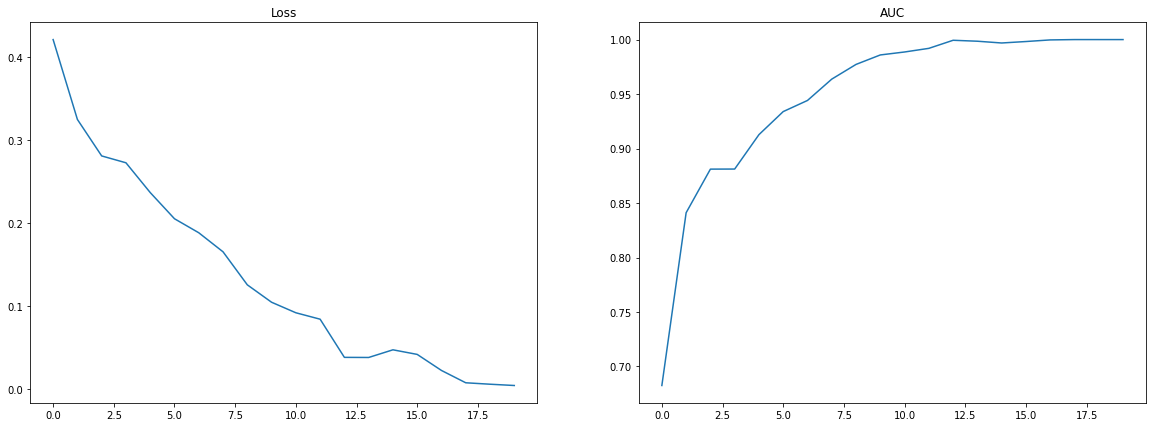

In [45]:
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(history.history['auc'])
plt.title('AUC')
plt.show()

In [46]:
y_test_prob = model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [47]:
test_pred = np.where(y_test_prob >= 0.5,1,0)

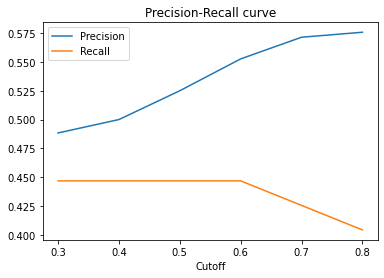

In [48]:
# y_test_pred = np.where(y_test_prob >= thres,1,0)
plotPrecisionRecallCurve(y_test_prob,y_test)

In [50]:
def printMetrics(y_test,y_test_pred):
  print(classification_report(y_test,y_test_pred))
  print('Accuracy score:',round(accuracy_score(y_test,y_test_pred),2))
  print('F1 score:',round(f1_score(y_test,y_test_pred),2))
  print('ROC_AUC score:',round(roc_auc_score(y_test,y_test_pred),2))
  print('Precision score:',round(precision_score(y_test,y_test_pred),2))
  print('Recall score:',round(recall_score(y_test,y_test_pred),2))

In [51]:
printMetrics(y_test,test_pred)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       247
           1       0.53      0.45      0.48        47

    accuracy                           0.85       294
   macro avg       0.71      0.68      0.70       294
weighted avg       0.84      0.85      0.84       294

Accuracy score: 0.85
F1 score: 0.48
ROC_AUC score: 0.68
Precision score: 0.52
Recall score: 0.45


# Using lazypredict for full model analysis

In [53]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [55]:
clf = LazyClassifier(verbose=1,ignore_warnings=True)
models,predictions = clf.fit(X_train,X_test,y_train,y_test)
models

  3%|▎         | 1/29 [00:00<00:10,  2.79it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8775510204081632, 'Balanced Accuracy': 0.6945473339650271, 'ROC AUC': 0.6945473339650271, 'F1 Score': 0.865202906820623, 'Time taken': 0.35715293884277344}


  7%|▋         | 2/29 [00:00<00:07,  3.61it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.8537414965986394, 'Balanced Accuracy': 0.59423722973555, 'ROC AUC': 0.59423722973555, 'F1 Score': 0.8220753698304719, 'Time taken': 0.2112751007080078}
{'Model': 'BernoulliNB', 'Accuracy': 0.8163265306122449, 'Balanced Accuracy': 0.6581100870014643, 'ROC AUC': 0.6581100870014642, 'F1 Score': 0.8163265306122449, 'Time taken': 0.045372724533081055}


 21%|██        | 6/29 [00:01<00:06,  3.77it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8707482993197279, 'Balanced Accuracy': 0.6560427254716168, 'ROC AUC': 0.6560427254716169, 'F1 Score': 0.8515851128096027, 'Time taken': 1.054931402206421}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7789115646258503, 'Balanced Accuracy': 0.6272288741493669, 'ROC AUC': 0.6272288741493669, 'F1 Score': 0.7865194321147536, 'Time taken': 0.0899040699005127}
{'Model': 'DummyClassifier', 'Accuracy': 0.8401360544217688, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.7671482641115597, 'Time taken': 0.023072242736816406}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.7278911564625851, 'Balanced Accuracy': 0.545180463433543, 'ROC AUC': 0.545180463433543, 'F1 Score': 0.7399062968176389, 'Time taken': 0.02232956886291504}


 38%|███▊      | 11/29 [00:02<00:03,  5.99it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.8571428571428571, 'Balanced Accuracy': 0.5790335084847963, 'ROC AUC': 0.5790335084847963, 'F1 Score': 0.8176596337949623, 'Time taken': 0.423961877822876}
{'Model': 'GaussianNB', 'Accuracy': 0.5986394557823129, 'Balanced Accuracy': 0.6146954948746662, 'ROC AUC': 0.6146954948746662, 'F1 Score': 0.6522275229631452, 'Time taken': 0.03059530258178711}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8503401360544217, 'Balanced Accuracy': 0.5577569127401154, 'ROC AUC': 0.5577569127401154, 'F1 Score': 0.804907677356657, 'Time taken': 0.09986090660095215}


 45%|████▍     | 13/29 [00:02<00:02,  5.60it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.8061224489795918, 'Balanced Accuracy': 0.5314411232664312, 'ROC AUC': 0.5314411232664312, 'F1 Score': 0.775669202086464, 'Time taken': 0.19977235794067383}
{'Model': 'LabelSpreading', 'Accuracy': 0.8061224489795918, 'Balanced Accuracy': 0.5314411232664312, 'ROC AUC': 0.5314411232664312, 'F1 Score': 0.775669202086464, 'Time taken': 0.18252229690551758}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8741496598639455, 'Balanced Accuracy': 0.6925230424670514, 'ROC AUC': 0.6925230424670513, 'F1 Score': 0.8623504908100937, 'Time taken': 0.05147290229797363}


 55%|█████▌    | 16/29 [00:03<00:02,  5.55it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.8639455782312925, 'Balanced Accuracy': 0.6778361615987596, 'ROC AUC': 0.6778361615987596, 'F1 Score': 0.8521254655708438, 'Time taken': 0.3498826026916504}
{'Model': 'LogisticRegression', 'Accuracy': 0.8673469387755102, 'Balanced Accuracy': 0.6884744594711, 'ROC AUC': 0.6884744594711, 'F1 Score': 0.8567079066089643, 'Time taken': 0.1372385025024414}


 66%|██████▌   | 19/29 [00:03<00:01,  8.53it/s]

{'Model': 'NearestCentroid', 'Accuracy': 0.6972789115646258, 'Balanced Accuracy': 0.6733999483159618, 'ROC AUC': 0.6733999483159618, 'F1 Score': 0.7341870872578903, 'Time taken': 0.05956602096557617}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.7789115646258503, 'Balanced Accuracy': 0.653070893272461, 'ROC AUC': 0.653070893272461, 'F1 Score': 0.7906623529302932, 'Time taken': 0.04326319694519043}
{'Model': 'Perceptron', 'Accuracy': 0.7721088435374149, 'Balanced Accuracy': 0.666250323025239, 'ROC AUC': 0.666250323025239, 'F1 Score': 0.7878574023597857, 'Time taken': 0.04533863067626953}


 72%|███████▏  | 21/29 [00:03<00:00,  9.66it/s]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.2755102040816326, 'Balanced Accuracy': 0.5429838918080799, 'ROC AUC': 0.5429838918080799, 'F1 Score': 0.2633580780176911, 'Time taken': 0.09218263626098633}


 79%|███████▉  | 23/29 [00:04<00:01,  5.88it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.8571428571428571, 'Balanced Accuracy': 0.5790335084847963, 'ROC AUC': 0.5790335084847963, 'F1 Score': 0.8176596337949623, 'Time taken': 0.6039323806762695}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8673469387755102, 'Balanced Accuracy': 0.6023343957274528, 'ROC AUC': 0.6023343957274528, 'F1 Score': 0.8323890255855634, 'Time taken': 0.025224685668945312}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8673469387755102, 'Balanced Accuracy': 0.6023343957274528, 'ROC AUC': 0.6023343957274528, 'F1 Score': 0.8323890255855634, 'Time taken': 0.028929948806762695}
{'Model': 'SGDClassifier', 'Accuracy': 0.826530612244898, 'Balanced Accuracy': 0.6900249806184856, 'ROC AUC': 0.6900249806184856, 'F1 Score': 0.8286831813372882, 'Time taken': 0.04008364677429199}


 90%|████████▉ | 26/29 [00:04<00:00,  7.64it/s]

{'Model': 'SVC', 'Accuracy': 0.8809523809523809, 'Balanced Accuracy': 0.6276595744680851, 'ROC AUC': 0.6276595744680851, 'F1 Score': 0.8495798947562748, 'Time taken': 0.1365363597869873}


 97%|█████████▋| 28/29 [00:05<00:00,  5.60it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.8605442176870748, 'Balanced Accuracy': 0.5982858127315014, 'ROC AUC': 0.5982858127315014, 'F1 Score': 0.8271888342856974, 'Time taken': 0.6064679622650146}


100%|██████████| 29/29 [00:05<00:00,  5.29it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.8435374149659864, 'Balanced Accuracy': 0.5709363424928934, 'ROC AUC': 0.5709363424928934, 'F1 Score': 0.8079192918428257, 'Time taken': 0.32302427291870117}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.88,0.69,0.69,0.87,0.36
LinearDiscriminantAnalysis,0.87,0.69,0.69,0.86,0.05
SGDClassifier,0.83,0.69,0.69,0.83,0.04
LogisticRegression,0.87,0.69,0.69,0.86,0.14
LinearSVC,0.86,0.68,0.68,0.85,0.35
NearestCentroid,0.70,0.67,0.67,0.73,0.06
Perceptron,0.77,0.67,0.67,0.79,0.05
BernoulliNB,0.82,0.66,0.66,0.82,0.05
CalibratedClassifierCV,0.87,0.66,0.66,0.85,1.05


In [56]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [58]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_test_pred = ada.predict(X_test)
printMetrics(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.69      0.43      0.53        47

    accuracy                           0.88       294
   macro avg       0.79      0.69      0.73       294
weighted avg       0.86      0.88      0.87       294

Accuracy score: 0.88
F1 score: 0.53
ROC_AUC score: 0.69
Precision score: 0.69
Recall score: 0.43


In [59]:
params = {'n_estimators':[5,10,20,50,100,500,1000]}
ada = AdaBoostClassifier(learning_rate=1)
gcv = GridSearchCV(ada,param_grid=params,scoring='f1_weighted',n_jobs=-1,cv=4,verbose=1,return_train_score=True)
gcv.fit(X_train,y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=AdaBoostClassifier(learning_rate=1), n_jobs=-1,
             param_grid={'n_estimators': [5, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [60]:
print('Best params',gcv.best_params_)
print('Best score',gcv.best_score_)
best_model = gcv.best_estimator_
y_test_pred = best_model.predict(X_test)
printMetrics(y_test,y_test_pred)

Best params {'n_estimators': 100}
Best score 0.8623549478027323
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.62      0.38      0.47        47

    accuracy                           0.86       294
   macro avg       0.76      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294

Accuracy score: 0.86
F1 score: 0.47
ROC_AUC score: 0.67
Precision score: 0.62
Recall score: 0.38
